In [10]:
import pandas as pd
import numpy as np
import pickle
from sklearn import linear_model

In [11]:
#loading and separating our sensor dataset into labels and features
data = pd.read_csv('../data/containerData.csv', delimiter=",")
data.head()


,Timestamp,ID,Temperature(celsius),Target_Temperature(celsius),Amp,CumulativePowerConsumption,ContentType,Humidity,CO2,Door_Open,Maintainence_Required,Defrost_Cycle
0,2019-03-19 T15:50 Z,1739,1.166314,4.4,3.292374,11.506573,3,8.869222,7.495099,0,1,6
1,2019-03-19 T16:05 Z,1739,3.979301,4.4,2.942407,11.727594,4,-2.336991,-3.540896,0,1,6
2,2019-03-19 T16:20 Z,1739,1.070377,4.4,2.409779,8.050487,1,10.142936,15.937540,0,1,6
3,2019-03-19 T16:35 Z,1739,9.552380,4.4,3.940449,8.882198,2,13.710208,3.214708,0,1,6
4,2019-03-19 T16:50 Z,1739,7.927455,4.4,3.790703,12.315440,3,1.539946,17.381030,0,1,6


In [12]:
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline




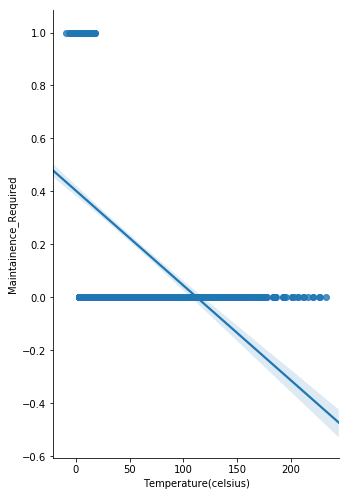

In [13]:
sns.pairplot(data, x_vars=['Temperature(celsius)'], y_vars='Maintainence_Required', size=7, aspect=0.7, kind='reg')









In [14]:
# create a Python list of feature names
feature_cols = ['Temperature(celsius)', 'Door_Open','Target_Temperature(celsius)','Amp','ContentType','CumulativePowerConsumption'
                          ,'Humidity','CO2','Defrost_Cycle']

# use the list to select a subset of the original DataFrame
#X = data[feature_cols]

X = data[['Temperature(celsius)', 'Door_Open','Target_Temperature(celsius)','Amp','ContentType','CumulativePowerConsumption'
                          ,'Humidity','CO2','Defrost_Cycle']]

# print the first 5 rows
X.head()

,Temperature(celsius),Door_Open,Target_Temperature(celsius),Amp,ContentType,CumulativePowerConsumption,Humidity,CO2,Defrost_Cycle
0,1.166314,0,4.4,3.292374,3,11.506573,8.869222,7.495099,6
1,3.979301,0,4.4,2.942407,4,11.727594,-2.336991,-3.540896,6
2,1.070377,0,4.4,2.409779,1,8.050487,10.142936,15.937540,6
3,9.552380,0,4.4,3.940449,2,8.882198,13.710208,3.214708,6
4,7.927455,0,4.4,3.790703,3,12.315440,1.539946,17.381030,6


In [15]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(3000, 9)


In [16]:
# select a Series from the DataFrame
y = data['Maintainence_Required']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.Maintainence_Required

# print the first 5 values
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Maintainence_Required, dtype: int64

In [17]:
# import  
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 9)
(750, 9)
(2250,)
(750,)


In [20]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)


#serializing our model to a file called model.pkl
pickle.dump(linreg, open("model.pkl","wb"))



In [21]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

0.5926233811346349
[ 2.07076225e-04 -5.10274604e-01  2.49800181e-16 -1.52094780e-02
 -1.27057443e-03 -5.06021278e-03 -1.54151635e-03  1.42844543e-03
  0.00000000e+00]


In [22]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)


In [23]:
y_pred

array([ 1.58071493e-02,  4.76190399e-01,  1.93510133e-03,  7.75772978e-03,
       -1.51177530e-02,  5.16816532e-01,  5.29233579e-01,  4.77118598e-01,
        5.17595056e-01,  4.78083497e-01, -6.82949550e-03, -2.46900867e-02,
        5.05577048e-01, -2.95074269e-02,  5.18440438e-01,  2.11615635e-02,
        5.16289733e-01,  5.06744615e-01,  2.15495595e-02,  5.37806454e-01,
        4.83346367e-01,  5.24237586e-01,  4.98460775e-01, -2.44637847e-02,
        5.12886256e-01,  5.03869248e-01,  4.57059028e-01,  6.93260639e-02,
        5.00705327e-01,  5.03987775e-01, -1.91071352e-02,  1.05918784e-02,
        4.95028246e-01,  4.97367191e-01,  5.05830000e-01,  4.96333433e-01,
       -2.12239291e-03,  5.05687745e-01,  4.98945374e-01,  5.17463789e-01,
        4.47860746e-01,  5.27035337e-01, -2.58483519e-02,  4.62584250e-01,
        4.93573806e-01,  5.02580012e-01,  1.16706397e-02,  3.26476954e-02,
       -5.50784223e-03,  4.96218539e-01,  5.01761832e-02, -5.63041623e-03,
        4.83786643e-01,  

In [24]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


0.40827871147642086


In [25]:
X_test

,Temperature(celsius),Door_Open,Target_Temperature(celsius),Amp,ContentType,CumulativePowerConsumption,Humidity,CO2,Defrost_Cycle
1957,193.607599,1,4.4,2.963883,1,8.412487,5.433678,-6.537456,6
2087,4.256761,0,4.4,3.056027,5,10.436259,18.236974,11.509913,6
1394,15.934972,1,4.4,2.757186,2,7.301713,10.064374,9.258803,6
1520,29.832493,1,4.4,2.401683,5,10.152423,5.419057,15.289041,6
1098,5.316424,1,4.4,3.413270,3,10.063335,3.869396,9.832852,6
393,5.899178,0,4.4,2.356535,4,9.412926,6.197672,14.757828,6
28,7.470882,0,4.4,1.891680,5,7.067470,3.118067,7.530529,6
99,0.938044,0,4.4,2.904178,4,10.425769,16.775350,8.520021,6
351,2.873156,0,4.4,1.823788,2,9.853129,8.519284,12.354882,6
2020,3.860104,0,4.4,4.111264,1,13.343045,10.232997,22.230121,6
